In [1]:

pip install tweedledum

Note: you may need to restart the kernel to use updated packages.


In [2]:
#If you get "The 'tweedledum' library is required to use 'PhaseOracle'. You can install it with 'pip install tweedledum'." restart the kernel.
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-04-23 14:30:33,984: Default instance: ibm-q-education/uni-pittsburgh-1/phys-1470


In [3]:
#This initialzes the backend, we choose whether to use a simulator or a real quantum computer
backend = service.get_backend("simulator_statevector")
#Real quantum computer
#backend = service.get_backend("ibmq_lima")
backend

<IBMBackend('simulator_statevector')>

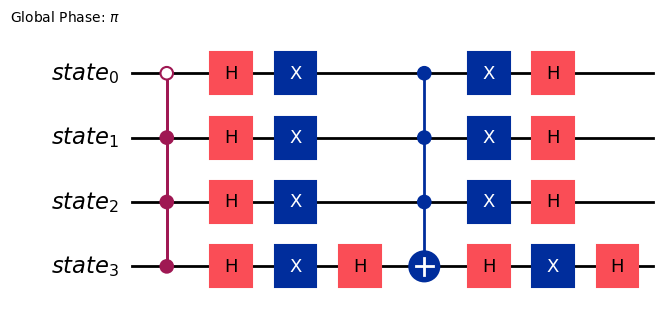

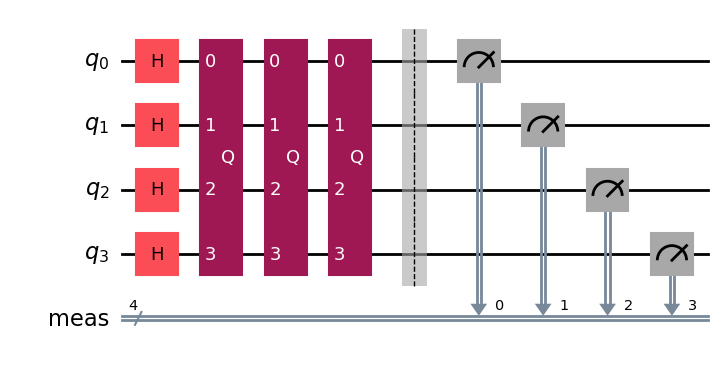

base_primitive._run:INFO:2024-04-23 14:30:43,138: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


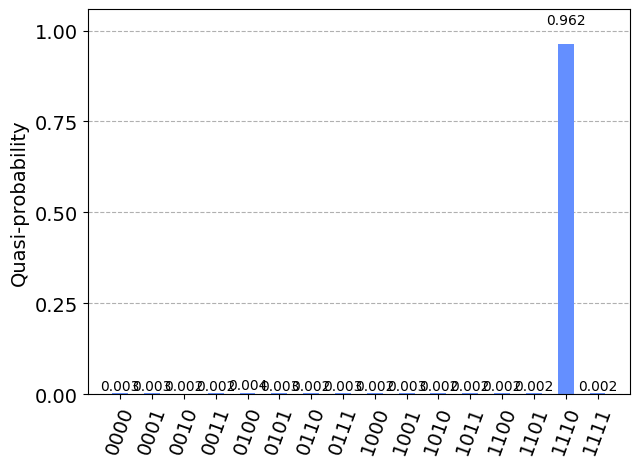

0.6845135688781738
{'quantum_seconds': None}


In [4]:
import math
import time
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.circuit.library.phase_oracle import PhaseOracle
from qiskit.exceptions import MissingOptionalLibraryError
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# This is the boolean expression we want to solve
expression = "(w ^ x) & ~(y ^ z) & (x & y & z)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    # This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print(t1-t0)
    print(job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

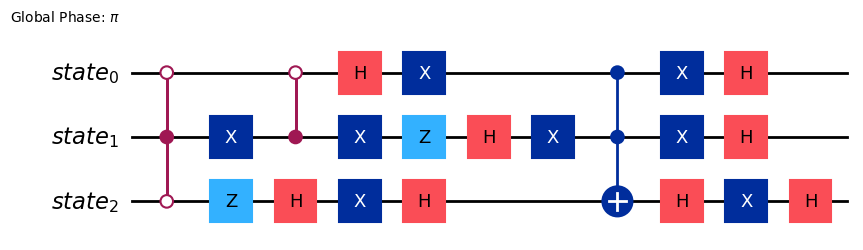

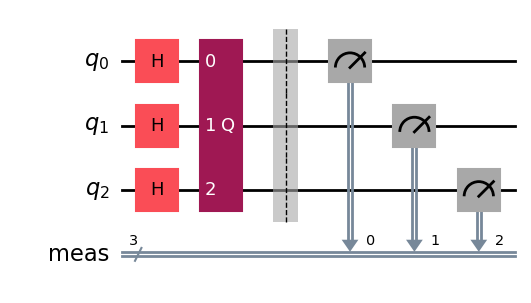

base_primitive._run:INFO:2024-04-23 14:30:47,379: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


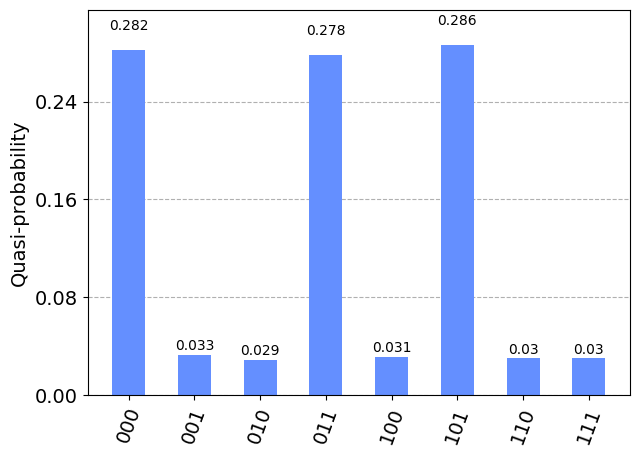

0.6834578514099121
{'quantum_seconds': None}


In [5]:
# This is the boolean expression has mulitple solutions
expression =  "(~x | ~y | ~z) & (x | ~y | z) & (x | y | ~z) & (x | ~y | ~z) & (~x | y | z)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover opearator from the oracle
    grover_op = GroverOperator(oracle)
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(3 / 2**grover_op.num_qubits))))
    
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print(t1-t0)
    print(job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    

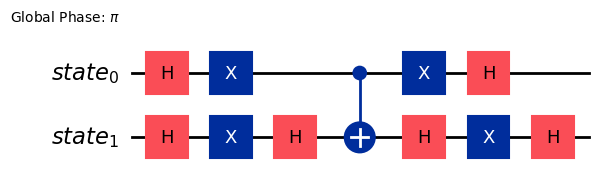

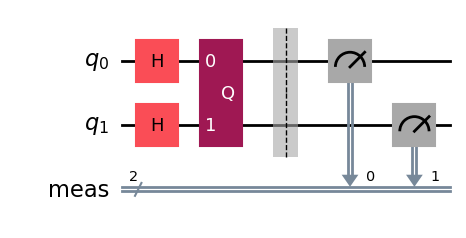

base_primitive._run:INFO:2024-04-23 14:30:51,600: Submitting job using options {'options': {'default_shots': 10000}, 'version': 2, 'support_qiskit': True}
/opt/conda/lib/python3.10/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:878: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


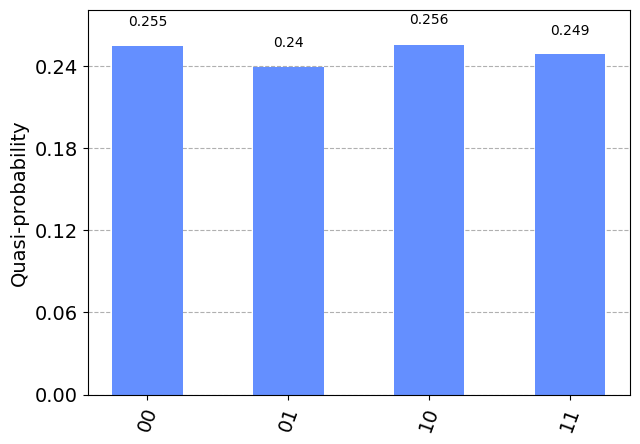

0.6648471355438232
{'quantum_seconds': None}


In [ ]:
# This is the boolean expression we want to solve
expression = "(x & y) & (~x & y)"
try:
    # This creates the oracle for the specific boolean expression
    oracle = PhaseOracle(expression)
   
    #This creates the grover operator from the oracle
    grover_op = GroverOperator(oracle)
    
    # This shows the circuit for the oracle
    display(grover_op.decompose().draw(output="mpl", style="iqp"))
    
    #This calculates the optimal number of times to apply the grover operator
    optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits))))
    
    #This creates the quantum circuit
    qc = QuantumCircuit(grover_op.num_qubits)
    
    # Create even superposition of all basis states
    qc.h(range(grover_op.num_qubits))
    
    # Apply Grover operator the optimal number of times
    qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
    
    # Measure all qubits
    qc.measure_all()
    
    #This shows the circuit
    display(qc.draw(output="mpl", style="iqp"))

    #This code optimizes the circuit for the computer or simulater
    target = backend.target
    pm = generate_preset_pass_manager(target=target, optimization_level=3)

    circuit_isa = pm.run(qc)
    
    #This creates the sampler based on the backend we chose earlier
    sampler = Sampler(backend=backend)
    
    #This sets the number of shots for the sampler
    sampler.options.default_shots = 10_000
    
    #This helps time the code
    t0 = time.time()
    
    #This runs the sampler
    job = sampler.run([circuit_isa])
    
    #This helps time the code
    t1 = time.time()
    
    #This gets the result of the sample
    result = job.result()
    
    #This gets the distribution from the result of the sampler
    dist = result[0].data.meas.get_counts()
    
    #This plots the distribution
    display(plot_distribution(dist))
    
    print(t1-t0)
    print(job.usage_estimation)
except MissingOptionalLibraryError as ex:
    print(ex)
    